# Enclaves

In [1]:
import geopandas
import pandas
import starepandas
import pystare
import shapely
import matplotlib.pyplot as plt

In [2]:
level = 8

In [3]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
rsa = world[world.name=='South Africa']
rsa = starepandas.STAREDataFrame(rsa, add_sids=True, level=level, add_trixels=True)

In [4]:
rsa.set_geometry(rsa._trixel_column_name, inplace=False)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,sids,trixels
25,54841552,Africa,South Africa,ZAF,739100.0,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082...","[2814749767106567, 2858730232217608, 286752632...","MULTIPOLYGON (((18.95439 -31.03247, 18.31675 -..."


In [5]:
len(rsa.sids.iloc[0])

282

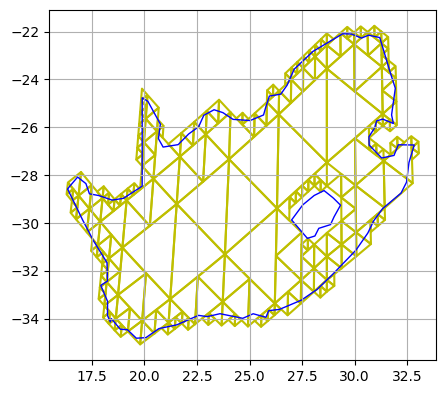

In [6]:
# Just to verify if simplification is OK
fig, ax = plt.subplots(dpi=100, figsize=(5,5))
ax.grid(True)

rsa.plot(ax=ax, trixels=True, boundary=True, color='y', zorder=0)
rsa.plot(ax=ax, trixels=False, facecolor="none", edgecolor='blue', lw=1, zorder=1)

plt.savefig('lesotho.png')

In [7]:
rsa.trixels

25    MULTIPOLYGON (((18.95439 -31.03247, 18.31675 -...
Name: trixels, dtype: geometry

## Exterior

<AxesSubplot:>

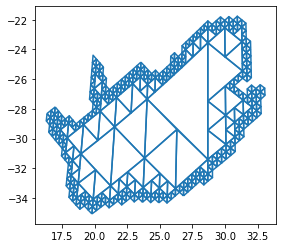

In [8]:
exterior = rsa.iloc[0].geometry.exterior
sids_ext = starepandas.sids_from_ring(exterior, level=level, force_ccw=True)
df_ext = starepandas.STAREDataFrame(sids=sids_ext, add_trixels=True)
df_ext.plot(trixels=True)

## Interior CCW

<AxesSubplot:>

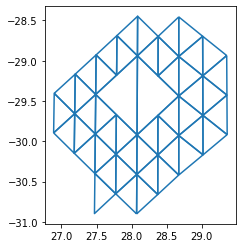

In [9]:
interiors = rsa.iloc[0].geometry.interiors
sids_int = starepandas.sids_from_ring(interiors[0], level=level, force_ccw=True)
df_int = starepandas.STAREDataFrame(sids=sids_int, add_trixels=True)
df_int.plot(trixels=True)

## Interior CW

<AxesSubplot:>

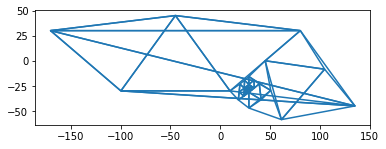

In [10]:
int_inv = interiors[0]
int_inv = shapely.geometry.polygon.LinearRing(int_inv.coords[::-1])
sids_int_inv = starepandas.sids_from_ring(int_inv, level=level, force_ccw=False)
df_int = starepandas.STAREDataFrame(sids=sids_int_inv, add_trixels=True)
df_int.plot(trixels=True)

## Combine

<AxesSubplot:>

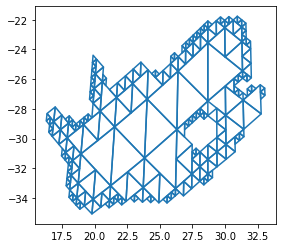

In [11]:
sids_hole = pystare.intersect(sids_int_inv, sids_ext)
df_int = starepandas.STAREDataFrame(sids=sids_hole, add_trixels=True)
df_int.plot(trixels=True)